In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [6]:
model=Sequential()

In [7]:
model.add(Conv2D(60,(3,3),input_shape=(170,100,3),activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [103]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [104]:
#layer two conv
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [105]:
#third layer conv
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [106]:
#fully connect
model.add(Flatten())
model.add(Dense(activation='relu',units=64))
model.add(Dense(activation='softmax',units=3))

In [107]:
#compiler
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [108]:

train = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.2,
        horizontal_flip=True)

test = ImageDataGenerator(rescale=1./255)

In [109]:
train = train.flow_from_directory(
        'C:/Users/raghava/tensorflow/train',
        target_size=(170,100),
        class_mode='categorical')

Found 440 images belonging to 3 classes.


In [110]:
test = test_datagen.flow_from_directory(
        'C:/Users/raghava/tensorflow/test',
        target_size=(170,100),
        class_mode='categorical')

Found 87 images belonging to 3 classes.


In [111]:
model.fit_generator(
        train,
        epochs=1,
        validation_data=test)

Epoch 1/5
14/14 [==============================] - 23s 2s/step - loss: 0.5368 - accuracy: 0.8432 - val_loss: 1.7656 - val_accuracy: 0.6437
Epoch 2/5
14/14 [==============================] - 24s 2s/step - loss: 0.3922 - accuracy: 0.8432 - val_loss: 1.9308 - val_accuracy: 0.6437
Epoch 3/5
14/14 [==============================] - 24s 2s/step - loss: 0.2927 - accuracy: 0.8841 - val_loss: 1.2754 - val_accuracy: 0.7701
Epoch 4/5
14/14 [==============================] - 24s 2s/step - loss: 0.2480 - accuracy: 0.9091 - val_loss: 0.5635 - val_accuracy: 0.7586
Epoch 5/5
14/14 [==============================] - 26s 2s/step - loss: 0.2499 - accuracy: 0.9227 - val_loss: 1.6561 - val_accuracy: 0.7471


In [112]:
train.class_indices

{'bikes': 0, 'cats': 1, 'laptop': 2}

In [113]:
label_map = (train.class_indices)
print(label_map)

{'bikes': 0, 'cats': 1, 'laptop': 2}


In [125]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/raghava/tensorflow/single_predict/cat.3.jpg' #place your folder where all the images contain
                           ,target_size =(170,100))


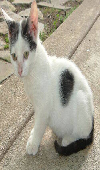

In [126]:
test_image

In [127]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [128]:
test_image.shape

(170, 100, 3)

In [129]:
test_image=test_image.reshape(1,170, 100, 3)

In [130]:
result = model.predict(test_image)

In [131]:
np.around(result)

array([[0., 1., 0.]], dtype=float32)

In [132]:
result=result.argmax()

In [133]:
result

1

In [134]:
## Class label of dog and cat

if result == 0:
    prediction = 'bike'
elif result == 1:
   prediction = 'cat'
else:
    prediction = 'laptop'
    

In [135]:
prediction

'cat'